In [2]:
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import numpy as np

#-------------------------------------------------------------------------------------JUPYTER NOTEBOOK SETTINGS-------------------------------------------------------------------------------------
from IPython.core.display import display, HTML                                    
display(HTML("<style>.container { width:100% !important; }</style>"))     

C:\Users\Ciprian-Florin Ifrim\AppData\Local\Temp\ipykernel_18472\2123623494.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


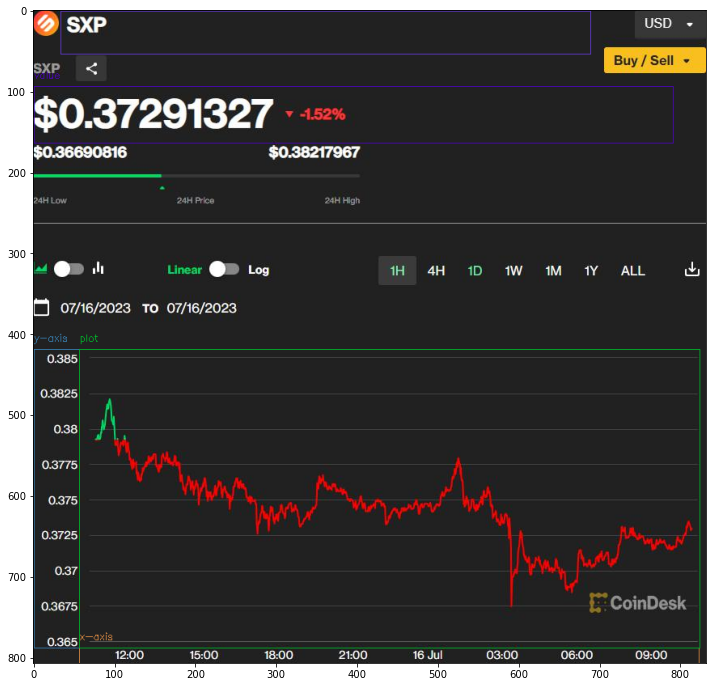

In [7]:
def get_data_from_xml(xml_file):
    """
    Extract bounding box data from a Pascal VOC xml file.
    """
    tree = ET.parse(xml_file)
    root = tree.getroot()
    objects = []
    for obj in root.iter('object'):
        name = obj.find('name').text
        xmlbox = obj.find('bndbox')
        xmin = int(float(xmlbox.find('xmin').text))
        ymin = int(float(xmlbox.find('ymin').text))
        xmax = int(float(xmlbox.find('xmax').text))
        ymax = int(float(xmlbox.find('ymax').text))
        objects.append((name, xmin, ymin, xmax, ymax))
    return objects


def display_image_with_boxes(image_path, bbox_data):
    """
    Display an image with bounding boxes.
    """
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for obj in bbox_data:
        name, xmin, ymin, xmax, ymax = obj
        color = tuple(np.random.randint(0, 256, 3).tolist())  # Create a random color
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color, 1)  # Draw rectangle with the random color and line thickness 1
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(image, name, (xmin, ymin-10), font, 0.4, color, 1)
        
    # Set the figure size
    plt.figure(figsize=(15, 12))  # Change this to your desired figure size
    
    plt.imshow(image)
    plt.show()


xml_file_path = 'pascal_voc_datasets/VOCdevkit/PlotsEnchanced_Original_NoAugmentation/Annotations/image48629.xml' 
image_file_path = 'pascal_voc_datasets/VOCdevkit/PlotsEnchanced_Original_NoAugmentation/JPEGImages/image48629.jpg'  

bbox_data = get_data_from_xml(xml_file_path)
display_image_with_boxes(image_file_path, bbox_data)
